<a href="https://colab.research.google.com/github/hackathon-ficaAi/churnInsight/blob/data-science/music_streaming_subscription_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Churn em Inscrições de Streaming de Música

## Colunas - Descrição

  `customer_id` - um número de identificação de cliente único

  `age` - a idade do usuário

  `location` - o estado do usuário nos EUA

  `subscription_type` - tipo de subscrição (básico, premium, etc)

  `payment_plan`- com que frequência o usuário paga, mensalmente ou anual

  `num_subscription_pauses`- número de vezes que o usuário pausou sua assinatura (máximo 2)

  `payment_method`- forma de pagamento do usuário

  `customer_service_inquiries`- a frequência de consultas de atendimento ao cliente do usuário

  `signup_date` - data em que o usuário se inscreveu no serviço de assinatura de música

  `weekly_hours`- número médio de horas que o usuário escutou algo semanalmente

  `average_session_length`- duração média de cada sessão que o usuário escutou  músicas (em horas)

  `song_skip_rate`- porcentagem de músicas que o usuário não termina

  `weekly_songs_played`- número médio de músicas que o usuário toca em uma semana

  `weekly_unique_songs`- número médio de músicas exclusivas que o usuário toca em uma semana

  `num_favorite_artists`- número de artistas favoritos do usuários

  `num_platform_friends`- número de conexões que o usuário teve com outros usuários(amigos) no aplicativo.

  `num_playlists_created`- número de playlists que o usuário criou

  `num_shared_playlists`- número de playlists que são compartilhadas publicamente

  `notifications_clicked`- número de notificações no aplicativo que foram clicadas

  `churned` - esta é a variável alvo, 0 = cliente está ativo, 1 = cliente inativo


JSON de entrada (Por enquanto):
```JSON
{
  "subscription_type": STR,
  "payment_plan": STR,
  "num_subscription_pauses": INTEGER,
  "customer_service_inquiries": STR,
  "weekly_unique_songs": FLOAT,
  "song_skip_rate": FLOAT,
  "num_platform_friends": INT,
  "num_playlists_created": INTEGER
}
```
['num_playlists_created',
 'num_subscription_pauses',
 'song_skip_rate',
 'num_platform_friends',
 'weekly_unique_songs',
 'churned']

In [111]:
import pandas as pd

url = "https://raw.githubusercontent.com/hackathon-ficaAi/churnInsight/refs/heads/main/data/music_streaming_train.csv"
df = pd.read_csv(url)

df.drop(columns=['signup_date','location','customer_id'], inplace=True)

df.head()

,age,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,60,family premium,annual,0,credit,none,8.231109,0.880944,0.10,148,93,8,74,8,4,0,0
1,69,basic,monthly,1,credit,few,13.109191,2.580870,0.60,158,80,4,54,12,3,54,0
2,36,premium,annual,1,debit,none,19.617798,0.935676,0.21,319,188,5,89,11,3,156,0
3,73,premium,monthly,0,debit,none,26.023783,0.878620,0.15,375,354,6,45,8,4,149,0
4,58,family premium,annual,0,credit,very frequent,17.876039,0.496145,0.01,239,124,8,69,12,6,0,0


Fazendo Tradução das variáveis

In [112]:
# ----------------------------------------------------------
# 1. RENOMEAR COLUNAS PARA PORTUGUÊS
# ----------------------------------------------------------
rename_cols = {
    "age": "idade",
    "subscription_type": "tipo_assinatura",
    "payment_plan": "plano_pagamento",
    "num_subscription_pauses": "num_pausas_assinatura",
    "payment_method": "metodo_pagamento",
    "customer_service_inquiries": "chamados_suporte",
    "weekly_hours": "horas_semanais",
    "average_session_length": "tempo_medio_sessao",
    "song_skip_rate": "taxa_skip_musica",
    "weekly_songs_played": "musicas_tocadas_semana",
    "weekly_unique_songs": "musicas_unicas_semana",
    "num_favorite_artists": "num_artistas_favoritos",
    "num_platform_friends": "num_amigos_plataforma",
    "num_playlists_created": "num_playlists_criadas",
    "num_shared_playlists": "num_playlists_compartilhadas",
    "notifications_clicked": "notificacoes_clicadas",
    "churned": "churned"
}
df = df.rename(columns=rename_cols)

# ----------------------------------------------------------
# 2. TRADUZIR VALORES CATEGÓRICOS
# ----------------------------------------------------------

# Tipo de assinatura
map_subscription_type = {
    "family premium": "familia premium",
    "basic": "basico",
    "premium": "premium",
    "student": "estudante"
}

# Plano de pagamento
map_payment_plan = {
    "annual": "anual",
    "monthly": "mensal"
}

# Método de pagamento
map_payment_method = {
    "credit": "credito",
    "debit": "debito",
    "venmo": "venmo"
}

# Frequência de chamados ao suporte
map_customer_service = {
    "very frequent": "muito frequente",
    "many": "muitos",
    "some": "alguns",
    "none": "nenhum",
    "few": "poucos"
}

# ----------------------------------------------------------
# 3. APLICAR AS TRADUÇÕES
# ----------------------------------------------------------

df["tipo_assinatura"] = df["tipo_assinatura"].replace(map_subscription_type)
df["plano_pagamento"] = df["plano_pagamento"].replace(map_payment_plan)
df["metodo_pagamento"] = df["metodo_pagamento"].replace(map_payment_method)
df["chamados_suporte"] = df["chamados_suporte"].replace(map_customer_service)

# ----------------------------------------------------------
# Mostrar preview
# ----------------------------------------------------------

df.head()


,idade,tipo_assinatura,plano_pagamento,num_pausas_assinatura,metodo_pagamento,chamados_suporte,horas_semanais,tempo_medio_sessao,taxa_skip_musica,musicas_tocadas_semana,musicas_unicas_semana,num_artistas_favoritos,num_amigos_plataforma,num_playlists_criadas,num_playlists_compartilhadas,notificacoes_clicadas,churned
0,60,familia premium,anual,0,credito,nenhum,8.231109,0.880944,0.10,148,93,8,74,8,4,0,0
1,69,basico,mensal,1,credito,poucos,13.109191,2.580870,0.60,158,80,4,54,12,3,54,0
2,36,premium,anual,1,debito,nenhum,19.617798,0.935676,0.21,319,188,5,89,11,3,156,0
3,73,premium,mensal,0,debito,nenhum,26.023783,0.878620,0.15,375,354,6,45,8,4,149,0
4,58,familia premium,anual,0,credito,muito frequente,17.876039,0.496145,0.01,239,124,8,69,12,6,0,0


In [113]:
# df[['age','payment_plan','weekly_hours','average_session_length','song_skip_rate','num_playlists_created', 'num_subscription_pauses','customer_service_inquiries']]

Separando variáveis categóricas e numéricas

In [114]:
categoricals = ['tipo_assinatura','plano_pagamento','metodo_pagamento','chamados_suporte']
numericals = list(set(df.columns) - set(categoricals))

Conferindo tipos de dados.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         12500 non-null  int64  
 1   tipo_assinatura               12500 non-null  object 
 2   plano_pagamento               12500 non-null  object 
 3   num_pausas_assinatura         12500 non-null  int64  
 4   metodo_pagamento              12500 non-null  object 
 5   chamados_suporte              12500 non-null  object 
 6   horas_semanais                12500 non-null  float64
 7   tempo_medio_sessao            12500 non-null  float64
 8   taxa_skip_musica              12500 non-null  float64
 9   musicas_tocadas_semana        12500 non-null  int64  
 10  musicas_unicas_semana         12500 non-null  int64  
 11  num_artistas_favoritos        12500 non-null  int64  
 12  num_amigos_plataforma         12500 non-null  int64  
 13  n

Verificação de valores nulos.

In [116]:
df.isna().sum()

,0
idade,0
tipo_assinatura,0
plano_pagamento,0
num_pausas_assinatura,0
metodo_pagamento,0
chamados_suporte,0
horas_semanais,0
tempo_medio_sessao,0
taxa_skip_musica,0
musicas_tocadas_semana,0


In [117]:
df[numericals].describe()

,taxa_skip_musica,tempo_medio_sessao,num_playlists_compartilhadas,churned,num_artistas_favoritos,musicas_unicas_semana,num_playlists_criadas,notificacoes_clicadas,horas_semanais,num_pausas_assinatura,idade,num_amigos_plataforma,musicas_tocadas_semana
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.00000,12500.000000,12500.000000,12500.000000
mean,0.374704,1.533194,6.280400,0.100240,5.571760,166.115200,11.832560,56.462240,15.588461,1.00296,51.666080,62.504960,239.229920
std,0.259824,1.074633,4.305259,0.300332,2.001292,106.954839,4.333897,67.945586,8.950505,0.81866,19.865856,21.870051,143.625467
min,0.000000,0.000120,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.001063,0.00000,18.000000,8.000000,4.000000
25%,0.170000,0.715074,3.000000,0.000000,4.000000,78.000000,9.000000,1.000000,7.773606,0.00000,34.000000,45.000000,118.000000
50%,0.330000,1.260440,5.000000,0.000000,5.000000,157.000000,11.000000,40.000000,15.792563,1.00000,52.000000,62.000000,236.000000
75%,0.500000,2.171458,8.000000,0.000000,7.000000,238.000000,14.000000,84.000000,23.338858,2.00000,69.000000,80.000000,350.000000
max,1.000000,5.083858,21.000000,1.000000,10.000000,582.000000,21.000000,406.000000,30.999597,2.00000,86.000000,116.000000,616.000000


In [118]:
df[categoricals].describe()

,tipo_assinatura,plano_pagamento,metodo_pagamento,chamados_suporte
count,12500,12500,12500,12500
unique,4,2,3,5
top,familia premium,anual,credito,muito frequente
freq,4922,8926,6385,2529


<Axes: >

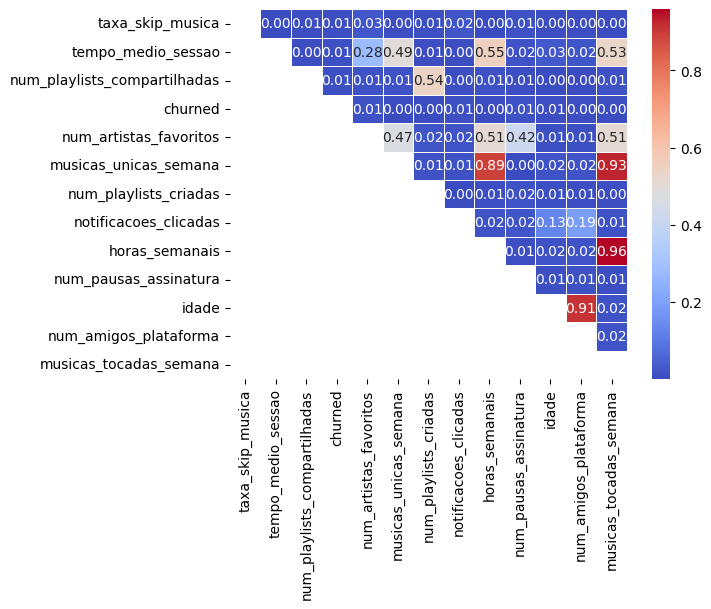

In [119]:
import seaborn as sns
import numpy as np

corr_matrix = df[numericals].corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

sns.heatmap(upper_triangle, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)

Removidos: 'weekly_songs_played','weekly_hours','num_favorite_artists','average_session_lenght','age', 'notifications_clicked'

In [120]:
remover = ['musicas_tocadas_semana','horas_semanais','num_artistas_favoritos','tempo_medio_sessao','idade','notificacoes_clicadas','num_playlists_compartilhadas']

for i in remover:
  numericals.remove(i)
numericals

['taxa_skip_musica',
 'churned',
 'musicas_unicas_semana',
 'num_playlists_criadas',
 'num_pausas_assinatura',
 'num_amigos_plataforma']

<Axes: >

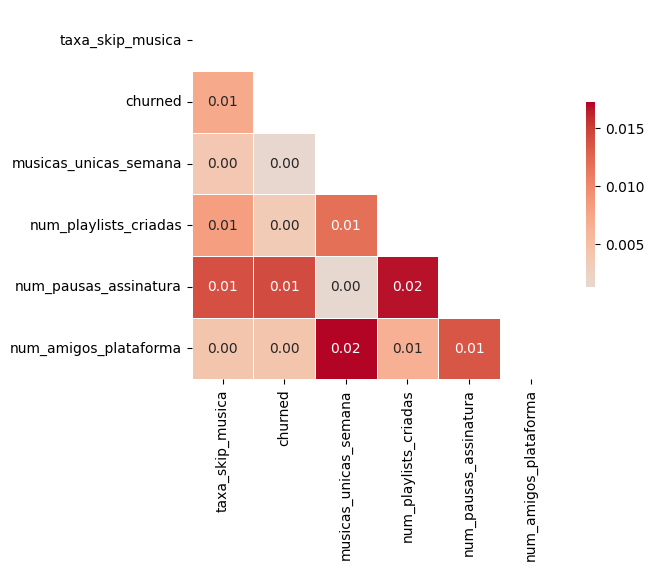

In [121]:
corr_matrix = df[numericals].corr().abs()

#upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#sns.heatmap(upper_triangle, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)



mask = np.triu(np.ones_like(corr_matrix,dtype=bool))


sns.heatmap(corr_matrix, mask=mask,cmap='coolwarm', center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},
            annot=True, fmt=".2f")

In [122]:
df[categoricals]['chamados_suporte'].value_counts()

,count
chamados_suporte,
muito frequente,2529
muitos,2516
alguns,2504
nenhum,2488
poucos,2463


In [123]:
vazios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
vazios

,0
idade,0
tipo_assinatura,0
plano_pagamento,0
num_pausas_assinatura,0
metodo_pagamento,0
chamados_suporte,0
horas_semanais,0
tempo_medio_sessao,0
taxa_skip_musica,0
musicas_tocadas_semana,0
